<a href="https://colab.research.google.com/github/PLONTZNathan/MachineLearning_Assignment2/blob/Elena/TASK1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/train_data.csv'
train = pd.read_csv(file_path)
file_path_2 = '/content/drive/MyDrive/test_data.csv'
test = pd.read_csv(file_path_2)

Mounted at /content/drive


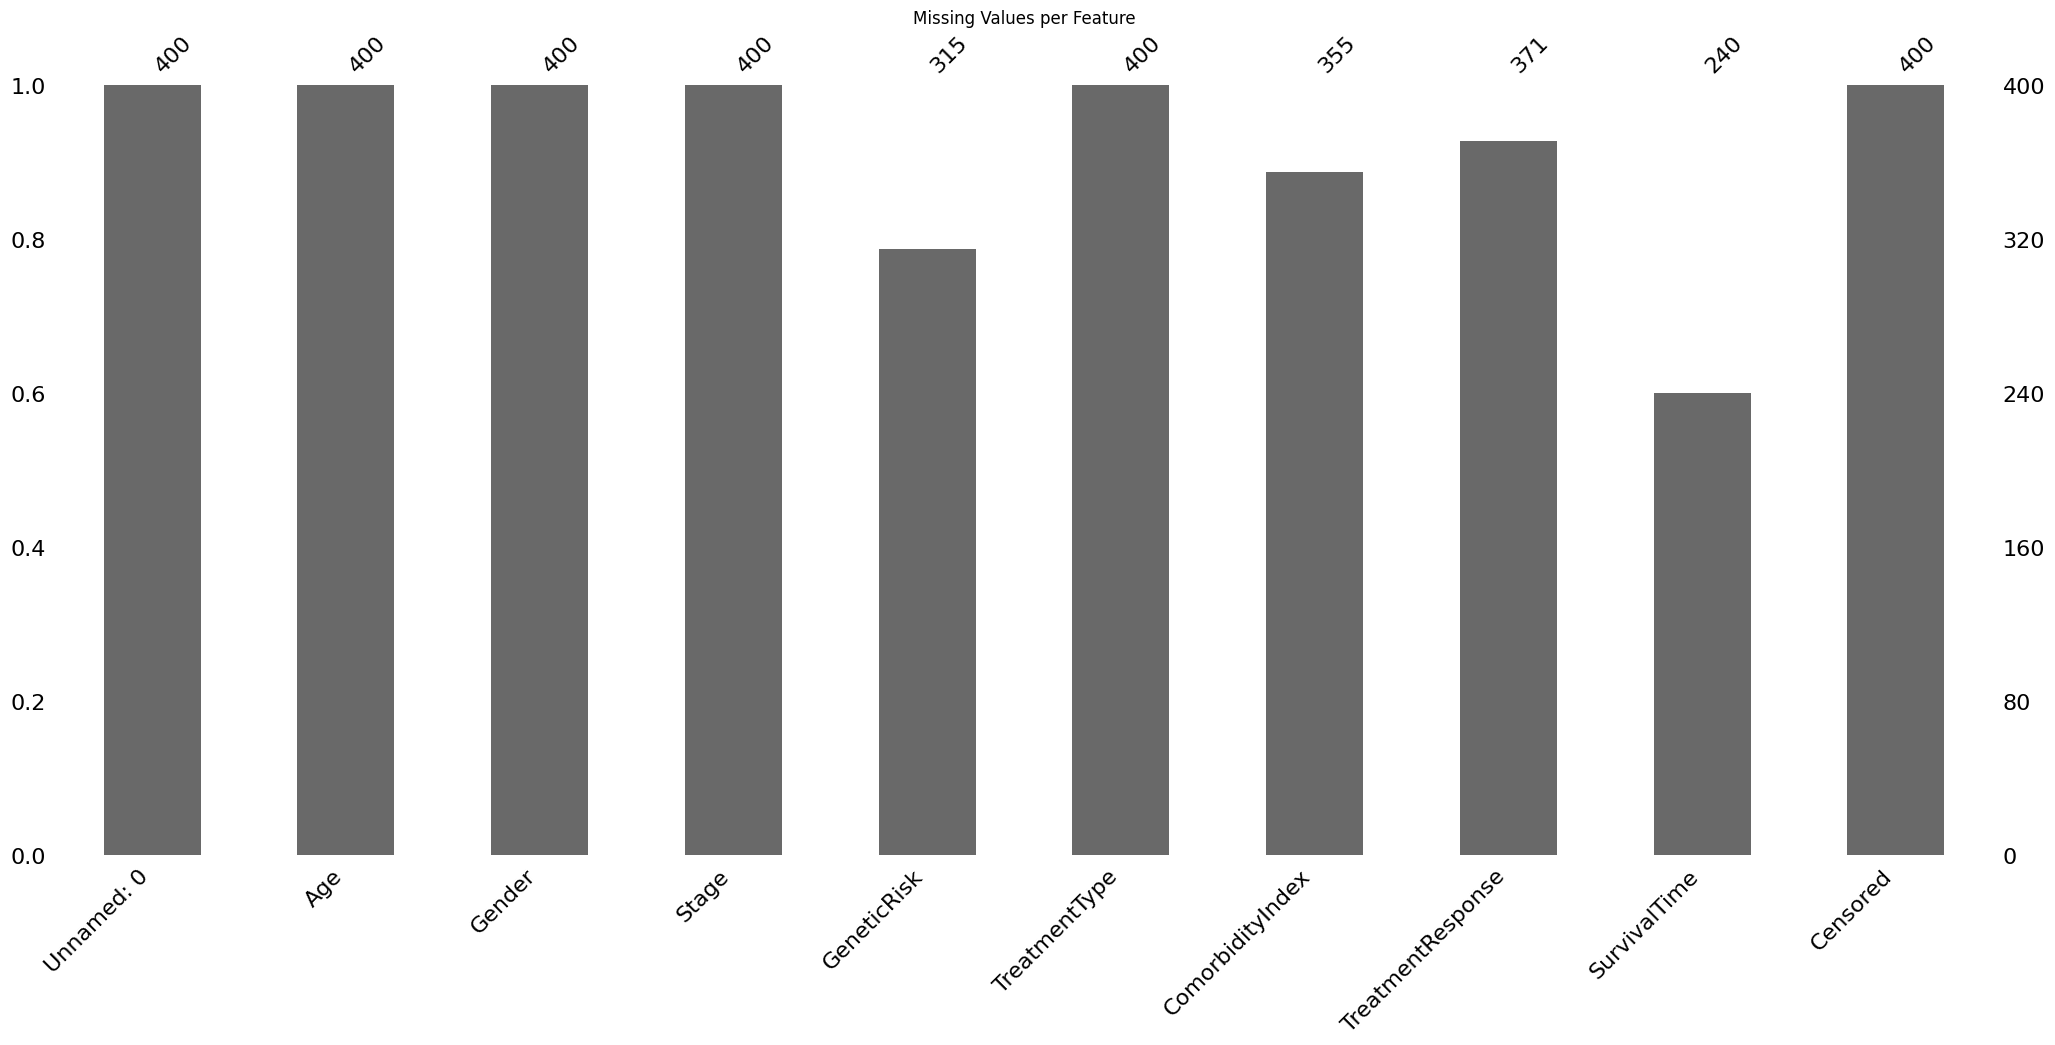

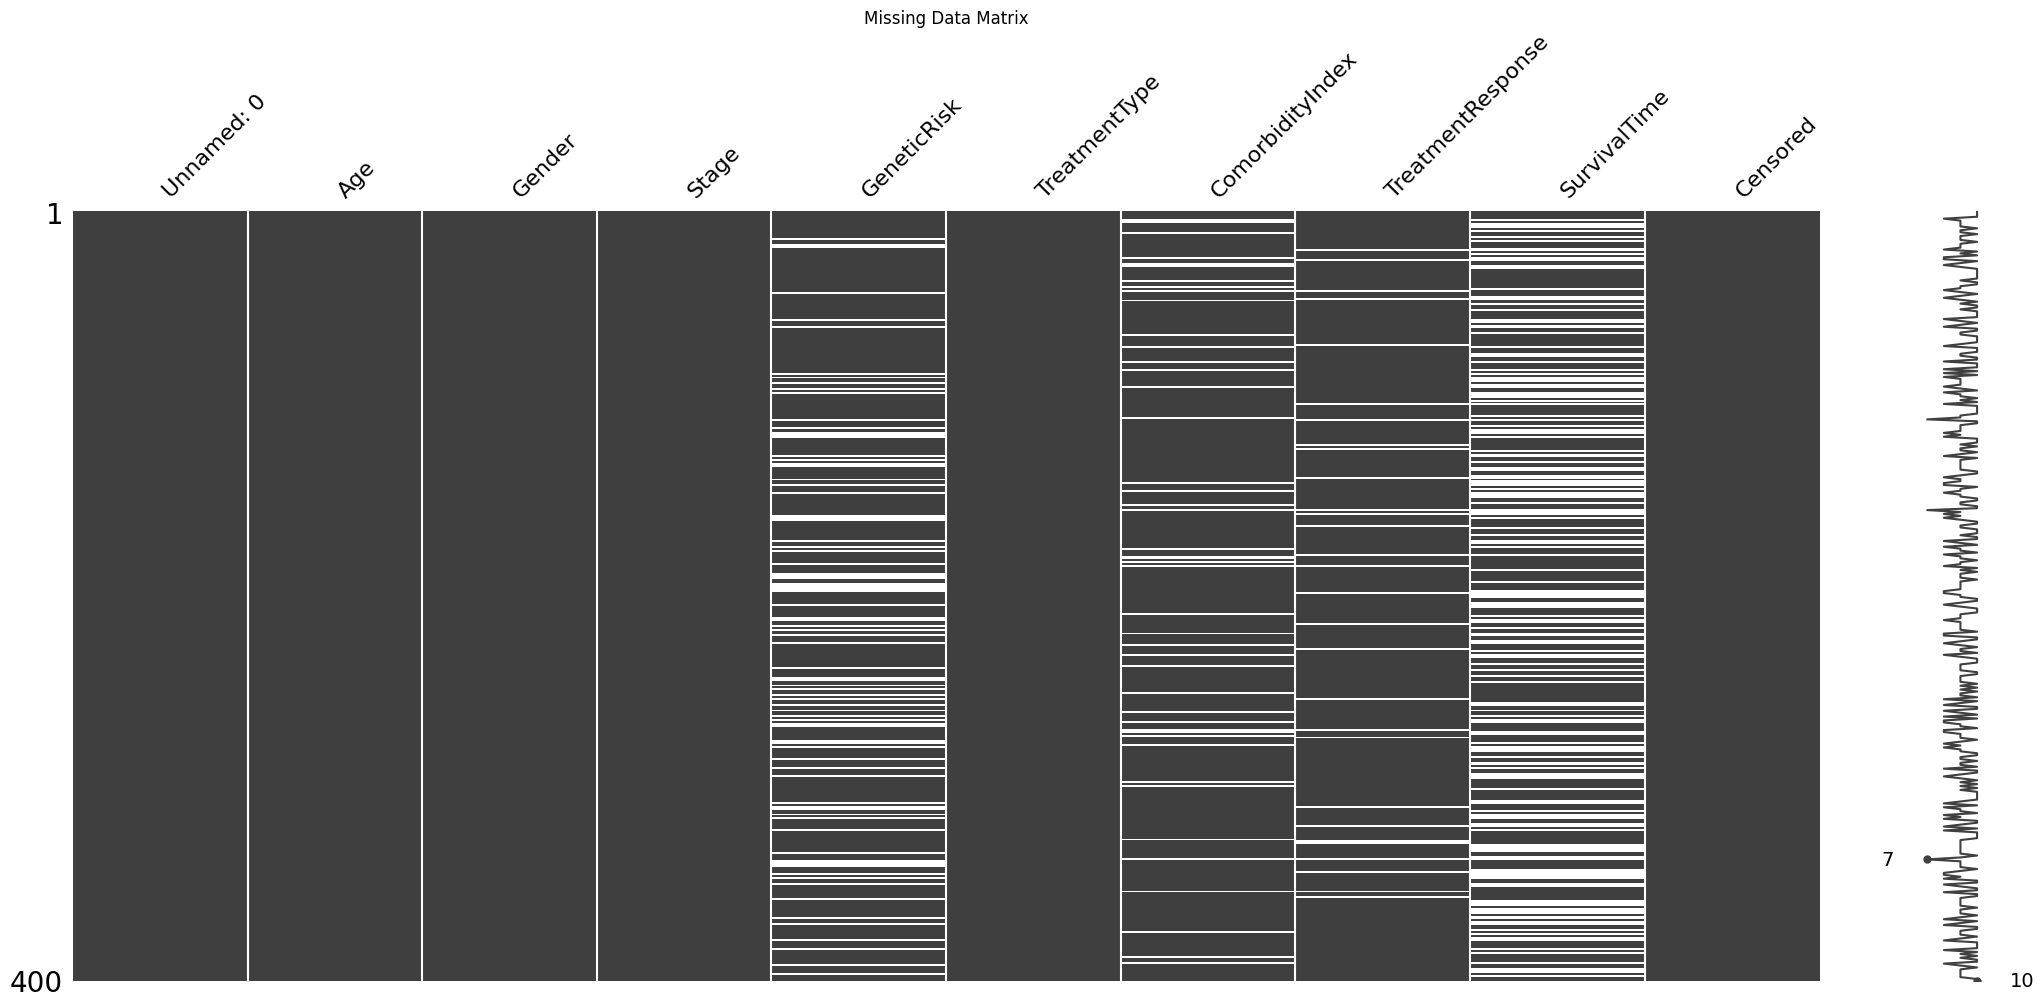

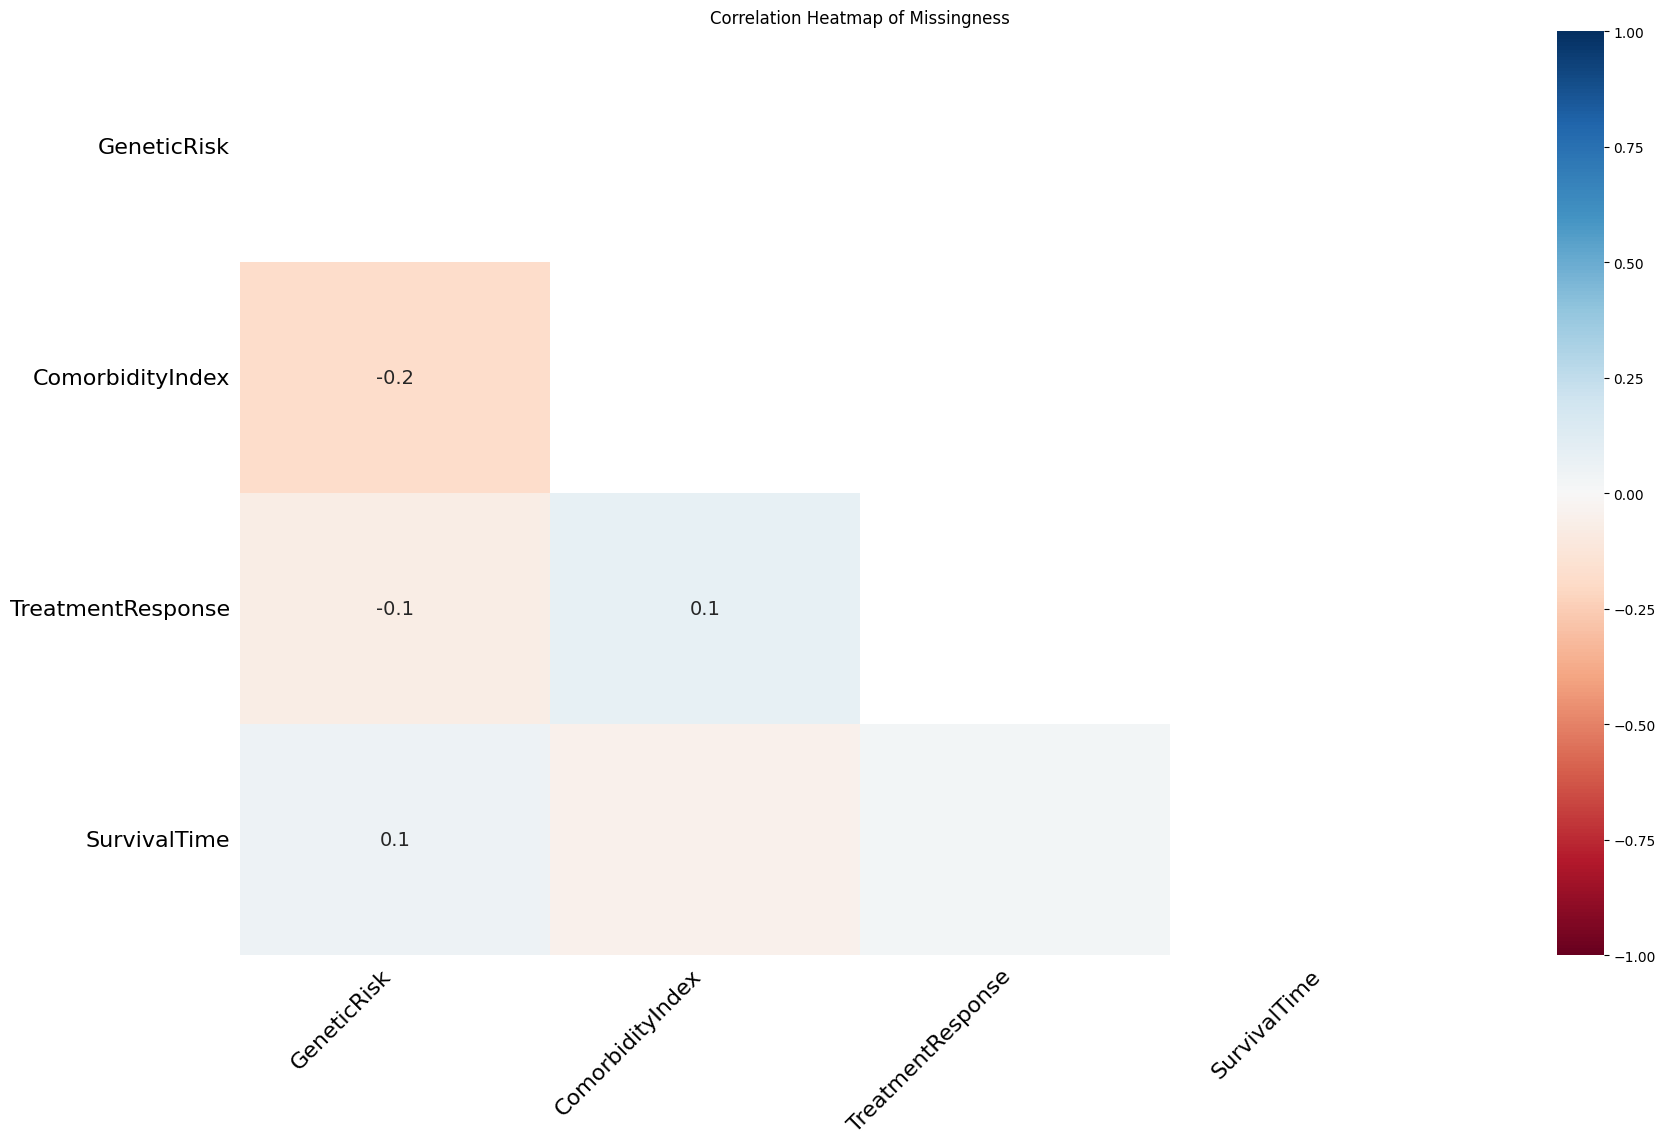

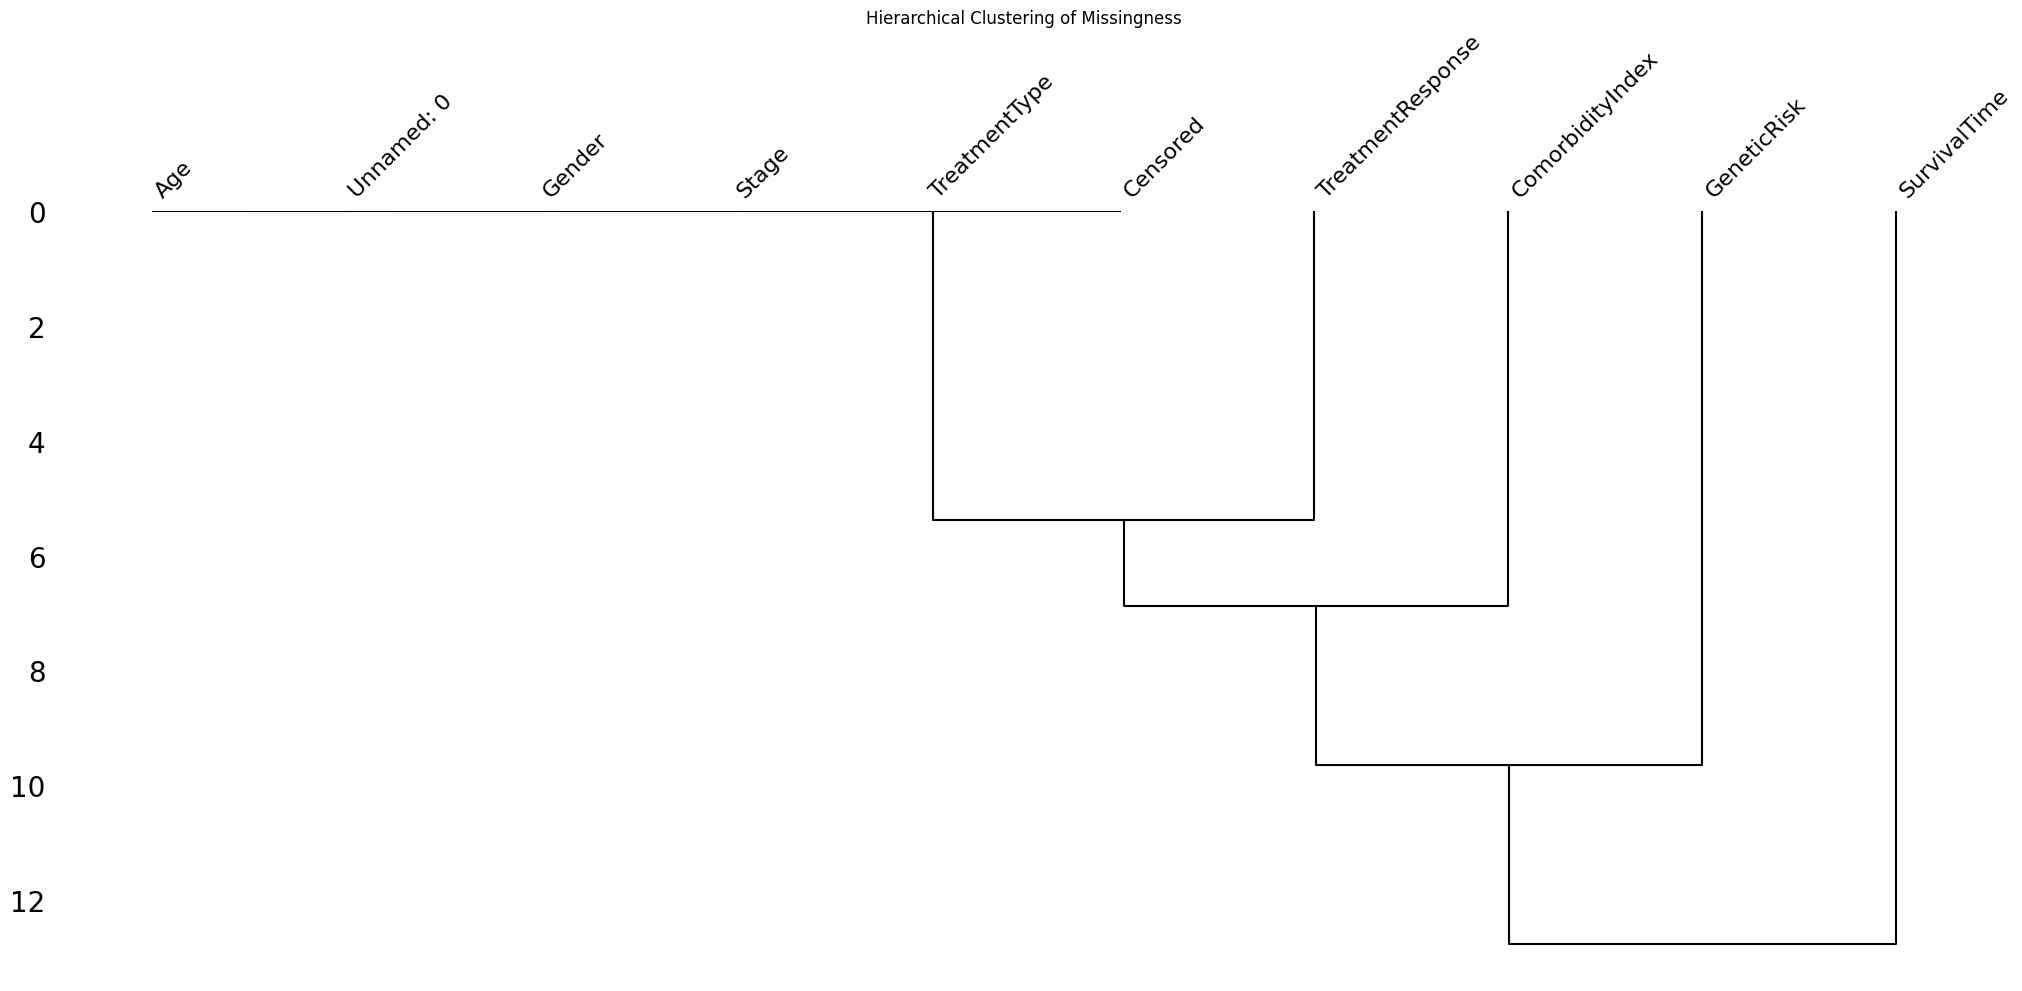

In [5]:
import missingno as msno

# visualizzazioni missing data
msno.bar(train)
plt.title("Missing Values per Feature")
plt.show()

msno.matrix(train)
plt.title("Missing Data Matrix")
plt.show()

msno.heatmap(train)
plt.title("Correlation Heatmap of Missingness")
plt.show()

msno.dendrogram(train)
plt.title("Hierarchical Clustering of Missingness")
plt.show()


In [15]:
for col in train.columns:
    print(col)

Unnamed: 0
Age
Gender
Stage
GeneticRisk
TreatmentType
ComorbidityIndex
TreatmentResponse
SurvivalTime
Censored


In [40]:
import pandas as pd

print(f"Initial dataset shape: {train.shape}")

# 1. Remove all samples with missing Survival Time
train = train.dropna(subset=["SurvivalTime"])
print(f"After removing rows with missing SurvivalTime: {train.shape}")

# 2. Remove columns that contain any missing values
cols_with_missing = train.columns[train.isnull().any()].tolist()
print(f"Columns with missing values: {cols_with_missing}")

train = train.drop(columns=cols_with_missing)
print(f"After dropping columns with missing data: {train.shape}")

# 3. Remove censored data points (Censored = 1)
if "Censored" in train.columns:
    train = train[train["Censored"] == 0]
    print(f"After removing censored data points: {train.shape}")
else:
    print("Column 'Censored' not found – skipped this step.")

print("\n Cleaning summary:")
print(f"Remaining samples: {train.shape[0]}")
print(f"Remaining features: {train.shape[1]}")

for col in train.columns:
    print(col)



Initial dataset shape: (161, 7)
After removing rows with missing SurvivalTime: (161, 7)
Columns with missing values: []
After dropping columns with missing data: (161, 7)
After removing censored data points: (161, 7)

 Cleaning summary:
Remaining samples: 161
Remaining features: 7
Unnamed: 0
Age
Gender
Stage
TreatmentType
SurvivalTime
Censored


Numeric features used in the pairplot: ['Unnamed: 0', 'Age', 'Gender', 'Stage', 'TreatmentType']


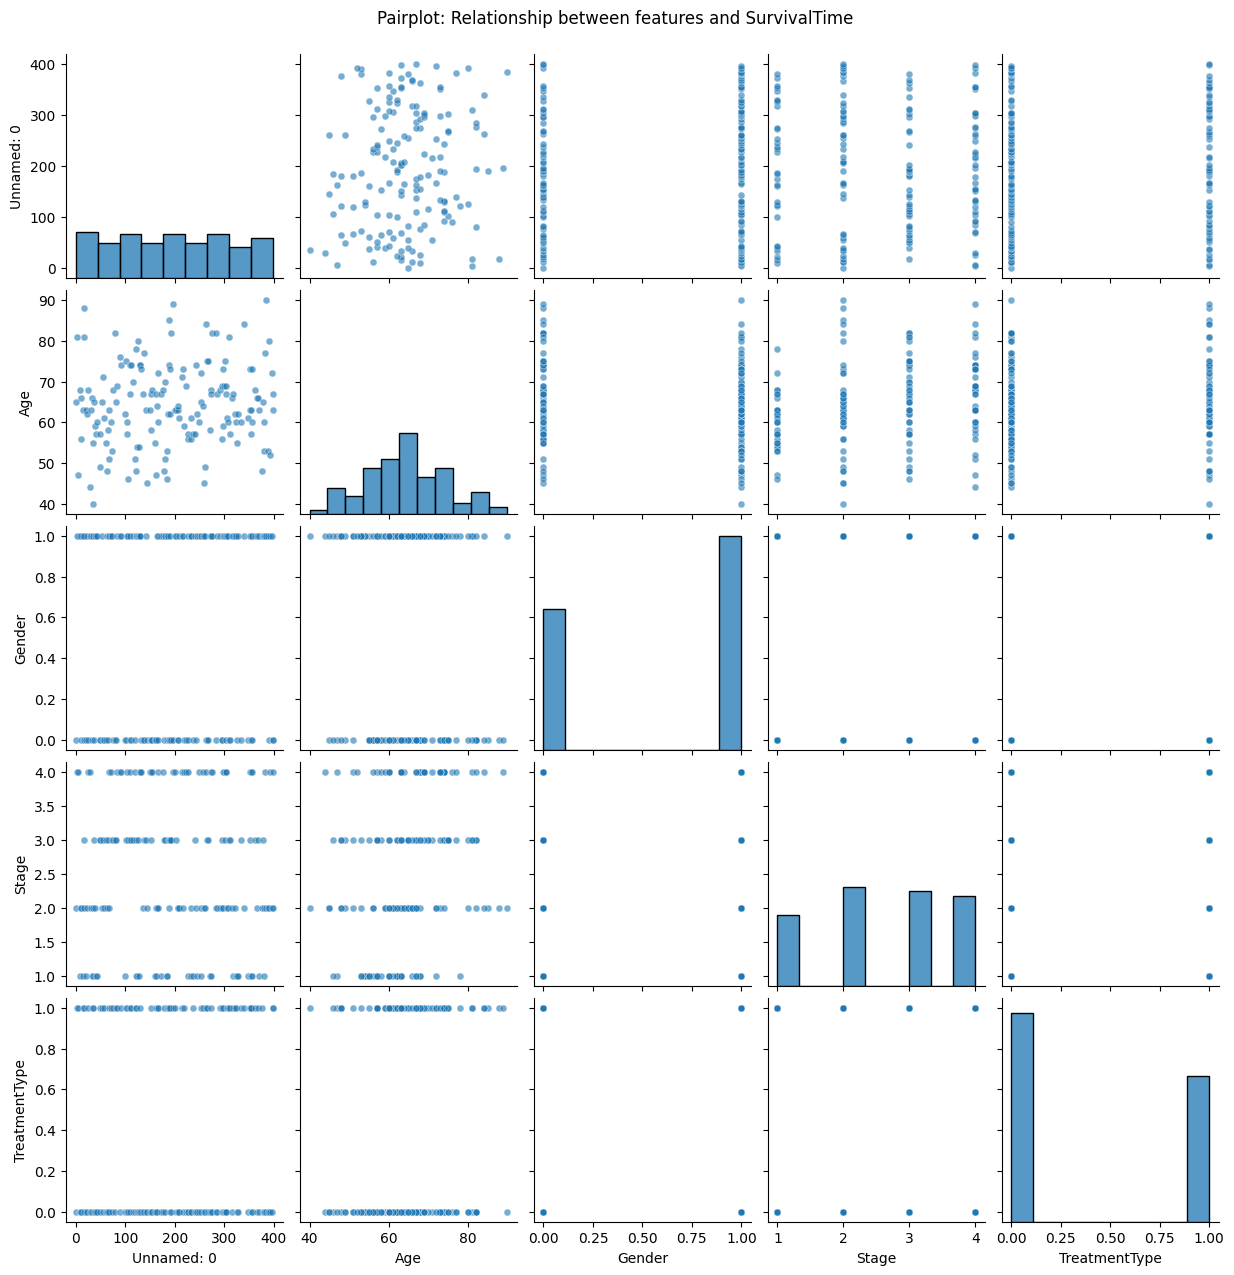

In [25]:

# Pairplot Analysis
import seaborn as sns
import matplotlib.pyplot as plt

# --- Identify numeric features (excluding target and censor flag) ---
numeric_features = [f for f in numeric_features if f not in ["SurvivalTime", "Censored"]]

print(f"Numeric features used in the pairplot: {numeric_features}")

# --- Plot pairwise relationships with the target variable ---
sns.pairplot(
    data=train,
    vars=numeric_features,
    y_vars="SurvivalTime",
    diag_kind="hist",
    plot_kws={"alpha": 0.6, "s": 25}
)
plt.suptitle("Pairplot: Relationship between features and SurvivalTime", y=1.02)
plt.show()



/tmp/ipython-input-3483685159.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y="SurvivalTime", data=train, palette="Set2")


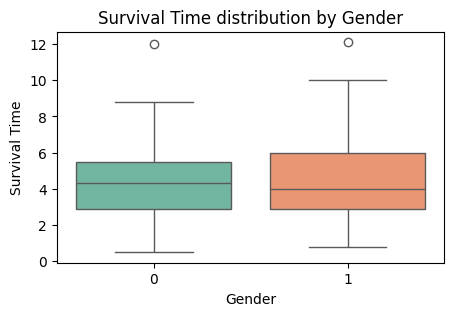

/tmp/ipython-input-3483685159.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y="SurvivalTime", data=train, palette="Set2")


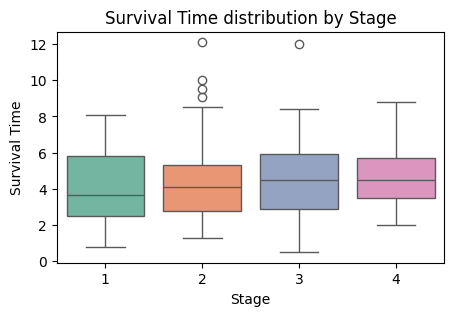

/tmp/ipython-input-3483685159.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y="SurvivalTime", data=train, palette="Set2")


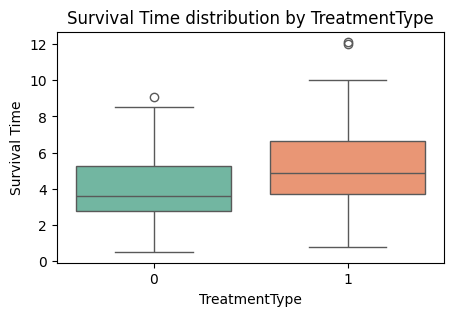

In [29]:
#Boxplots of Survival Time by categorical features
categorical = ["Gender", "Stage", "TreatmentType"]
for cat in categorical:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=cat, y="SurvivalTime", data=train, palette="Set2")
    plt.title(f"Survival Time distribution by {cat}")
    plt.xlabel(cat)
    plt.ylabel("Survival Time")
    plt.show()


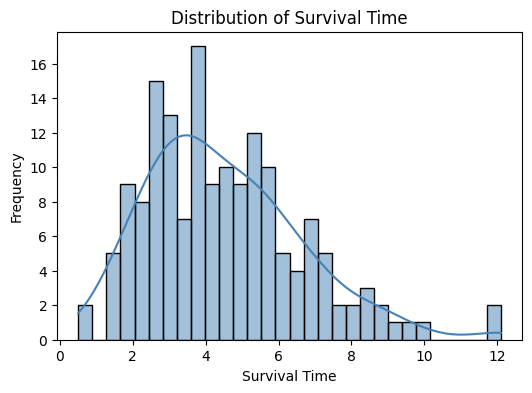

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.histplot(train["SurvivalTime"], kde=True, bins=30, color="steelblue")
plt.title("Distribution of Survival Time")
plt.xlabel("Survival Time")
plt.ylabel("Frequency")
plt.show()


In [27]:
# Defining X (features) and y (target)

import pandas as pd

# --- Target variable ---
y = train["SurvivalTime"]          # vector of survival times

# --- Feature matrix ---
# Remove the target and censor columns (they are not predictors)
X = train.drop(columns=["SurvivalTime", "Censored"], errors="ignore")

print(f"Shape of X (features): {X.shape}")
print(f"Shape of y (target): {y.shape}")
print("\nPreview of feature matrix:")
display(X.head())



Shape of X (features): (161, 5)
Shape of y (target): (161,)

Preview of feature matrix:


,Unnamed: 0,Age,Gender,Stage,TreatmentType
0,0,65.0,0,2,0
3,3,81.0,1,4,1
5,5,47.0,1,4,1
9,9,68.0,1,1,0
11,11,56.0,0,2,0


In [43]:
#train/validation/test split

from sklearn.model_selection import train_test_split, KFold

# Simple Train / Validation / Test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Hold-out split:")
print(f"  Train set:       {X_train.shape[0]} samples")
print(f"  Validation set:  {X_val.shape[0]} samples")
print(f"  Test set:        {X_test.shape[0]} samples\n")

# 5-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

train_sizes = []
val_sizes = []
for train_idx, val_idx in kfold.split(X):
    train_sizes.append(len(train_idx))
    val_sizes.append(len(val_idx))

print("5-Fold Cross-Validation:")
print(f"  Avg. train size per fold: {sum(train_sizes)/5:.0f}")
print(f"  Validation size per fold: {val_sizes[0]}")

# 10-fold cross-validation
kfold_10 = KFold(n_splits=10, shuffle=True, random_state=42)

train_sizes = []
val_sizes = []
for train_idx, val_idx in kfold_10.split(X):
    train_sizes.append(len(train_idx))
    val_sizes.append(len(val_idx))

print("10-Fold Cross-Validation:")
print(f"  Avg. train size per fold: {sum(train_sizes)/5:.0f}")
print(f"  Validation size per fold: {val_sizes[0]}")
#Given the moderate dataset size after censoring removal, a single hold-out validation would leave a small effective training set and yield unstable error estimates.
#In contrast, 5-fold cross-validation uses each observation for both training and validation, providing a more data-efficient and statistically reliable estimate of model performance.

Hold-out split:
  Train set:       112 samples
  Validation set:  24 samples
  Test set:        25 samples

5-Fold Cross-Validation:
  Avg. train size per fold: 129
  Validation size per fold: 33
10-Fold Cross-Validation:
  Avg. train size per fold: 290
  Validation size per fold: 17


In [36]:
def error_metric(y, y_hat, c):
    import numpy as np
    err = y-y_hat
    err = (1-c)*err**2 + c*np.maximum(0,err)**2
    return np.sum(err)/err.shape[0]

**Task 1.2 — Baseline Linear Regression**

[CV 3-fold] Baseline Linear Regression cMSE (≈ MSE): 4.9355
[CV 5-fold] Baseline Linear Regression cMSE (≈ MSE): 4.6301
[CV 7-fold] Baseline Linear Regression cMSE (≈ MSE): 4.6601
[CV 10-fold] Baseline Linear Regression cMSE (≈ MSE): 4.6437


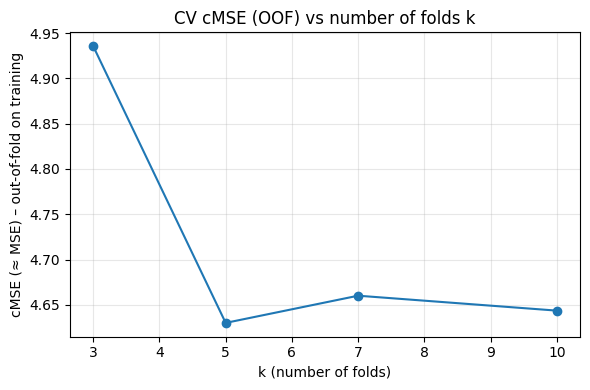

[Test] Baseline Linear Regression cMSE (≈ MSE): 4.3077


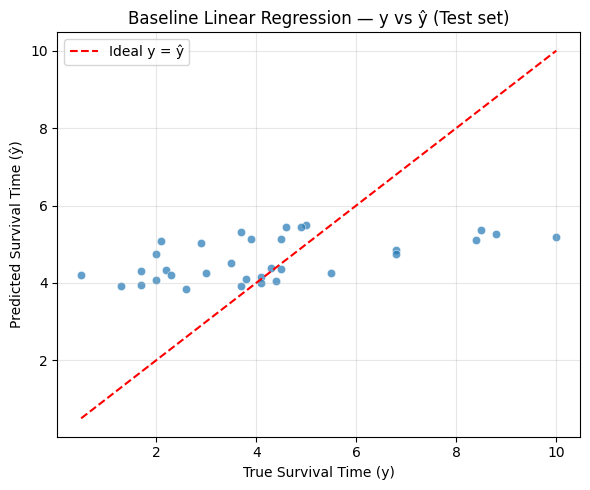

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Train/Test split (80/20)
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline: Standardize -> Linear Regression
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("lin", LinearRegression())
])

#Confronto k-fold (solo sul training)
k_list = [3, 5, 7, 10]
cv_scores = {}

for k in k_list:
    kfold = KFold(n_splits=k, shuffle=True, random_state=42)
    # out-of-fold predictions sul training
    y_tr_oof = cross_val_predict(pipe, X_tr, y_tr, cv=kfold)
    cmse_cv = error_metric(y_tr, y_tr_oof)  # ≈ MSE qui
    cv_scores[k] = cmse_cv
    print(f"[CV {k}-fold] Baseline Linear Regression cMSE (≈ MSE): {cmse_cv:.4f}")

# Grafico prestazioni vs k
plt.figure(figsize=(6,4))
plt.plot(list(cv_scores.keys()), list(cv_scores.values()), marker="o")
plt.title("CV cMSE (OOF) vs number of folds k")
plt.xlabel("k (number of folds)")
plt.ylabel("cMSE (≈ MSE) – out-of-fold on training")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Fit su tutto il training e valutazione sul test
pipe.fit(X_tr, y_tr)
y_te_hat = pipe.predict(X_te)
cmse_test = error_metric(y_te, y_te_hat)
print(f"[Test] Baseline Linear Regression cMSE (≈ MSE): {cmse_test:.4f}")

#  y–ŷ plot (test set)
plt.figure(figsize=(6,5))
sns.scatterplot(x=y_te, y=y_te_hat, alpha=0.7)
sns.lineplot(x=y_te, y=y_te, color="red", linestyle="--", label="Ideal y = ŷ")
plt.xlabel("True Survival Time (y)")
plt.ylabel("Predicted Survival Time (ŷ)")
plt.title("Baseline Linear Regression — y vs ŷ (Test set)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


[Selection] Best split seed = 5 with cMSE (≈ MSE) = 2.6891
[Best Split Test] Baseline Linear Regression cMSE (≈ MSE): 2.6891


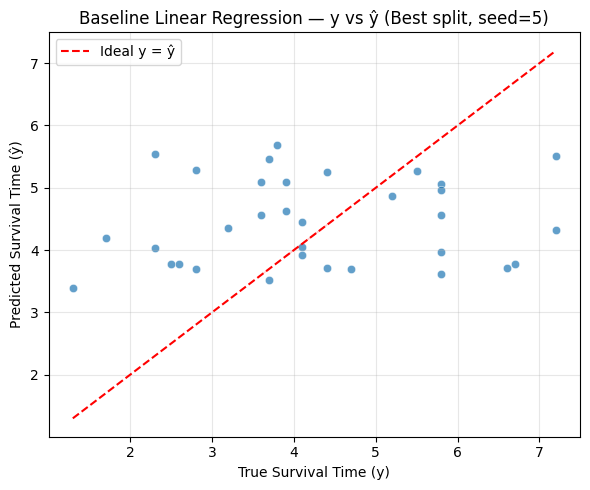

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Assumes X, y and error_metric(...) are already defined

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("lin", LinearRegression())
])

# Search the best random split (lowest test cMSE) over several seeds
seeds = list(range(10))  # increase if you want (e.g., range(50))
results = []

for seed in seeds:
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=seed)
    pipe.fit(X_tr, y_tr)
    y_te_hat = pipe.predict(X_te)
    cmse_test = error_metric(y_te, y_te_hat)  # ≈ MSE (all uncensored here)
    results.append((seed, cmse_test))

# pick best seed (minimum cMSE)
best_seed, best_cmse = min(results, key=lambda t: t[1])
print(f"[Selection] Best split seed = {best_seed} with cMSE (≈ MSE) = {best_cmse:.4f}")

# Refit and evaluate on the best split, then plot y–ŷ
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=best_seed)
pipe.fit(X_tr, y_tr)
y_te_hat = pipe.predict(X_te)
cmse_test = error_metric(y_te, y_te_hat)
print(f"[Best Split Test] Baseline Linear Regression cMSE (≈ MSE): {cmse_test:.4f}")

# y–ŷ plot on the best split
plt.figure(figsize=(6,5))
sns.scatterplot(x=y_te, y=y_te_hat, alpha=0.7)
sns.lineplot(x=y_te, y=y_te, color="red", linestyle="--", label="Ideal y = ŷ")
plt.xlabel("True Survival Time (y)")
plt.ylabel("Predicted Survival Time (ŷ)")
plt.title(f"Baseline Linear Regression — y vs ŷ (Best split, seed={best_seed})")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
